In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus :
  tf.config.experimental.set_memory_growth(gpu,True)

In [11]:
data_dict = "data0"
img_ext = ['png','jpeg','bmp',"jpg"]

In [10]:
dicte = os.listdir("data0")
dicte

['happy', 'sad']

In [12]:
import imghdr
for image_class in dicte:
  for image in os.listdir(os.path.join("data0",image_class)):
    image_path = os.path.join("data0",image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in img_ext:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))


Image not in ext list drive/MyDrive/data0/happy/vector12.svg
Image not in ext list drive/MyDrive/data0/happy/vector13.svg
Image not in ext list drive/MyDrive/data0/happy/vector5.svg
Image not in ext list drive/MyDrive/data0/happy/guilherme-stecanella-375176-unsplash.jpg
Image not in ext list drive/MyDrive/data0/happy/vector2.svg
Image not in ext list drive/MyDrive/data0/happy/happiness_thumbnail.jpg
Image not in ext list drive/MyDrive/data0/happy/oman-and-diverse-friends-hanging-out-in-a-cafe-together-after-the-2290057229.jpg
Image not in ext list drive/MyDrive/data0/happy/vector11.svg
Image not in ext list drive/MyDrive/data0/happy/vector14.svg
Image not in ext list drive/MyDrive/data0/happy/vector6.svg
Image not in ext list drive/MyDrive/data0/happy/traitshappypeople.jpg
Image not in ext list drive/MyDrive/data0/happy/vector.svg
Image not in ext list drive/MyDrive/data0/happy/vector4.svg
Image not in ext list drive/MyDrive/data0/happy/how-to-watch-shiny-happy-people-64a2f8ea7dc301458

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
data = tf.keras.utils.image_dataset_from_directory('./data0')

Found 287 files belonging to 2 classes.


In [17]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
data_iter = data.as_numpy_iterator()

In [19]:
batch = data_iter.next()

In [26]:
len(batch[0])

32

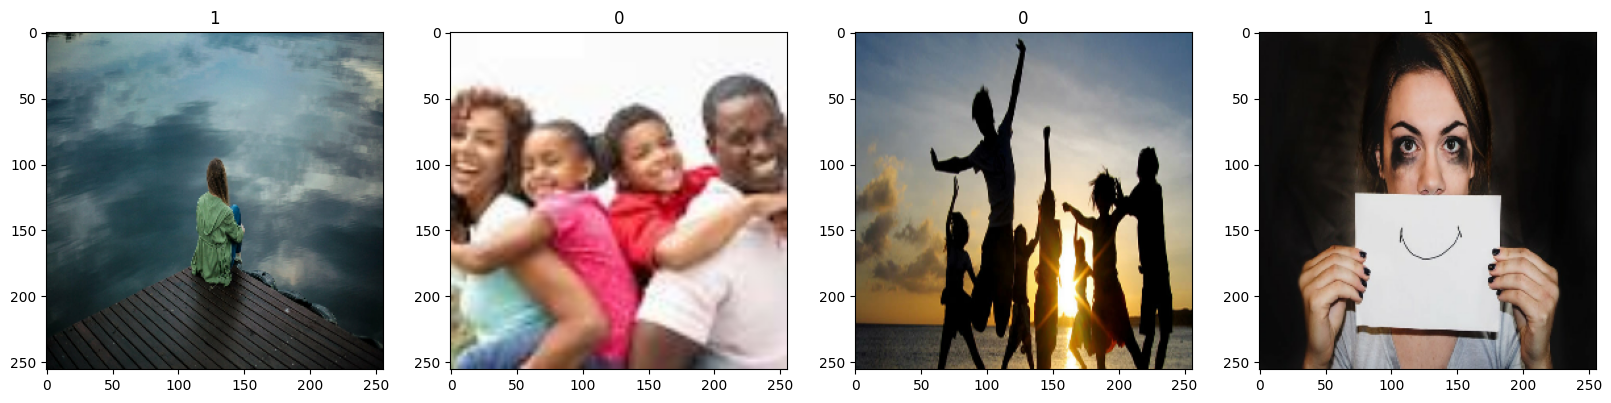

In [24]:
fig , ax = plt.subplots(ncols=4,figsize=(20,20))
for index, img in enumerate(batch[0][:4]):
  ax[index].imshow(img.astype(int))
  ax[index].set_title(batch[1][index])


In [27]:
scaled = batch[0]/255

In [34]:
data = data.map(lambda x,y : (x/255,y))

In [42]:
scaled = data.as_numpy_iterator().next()

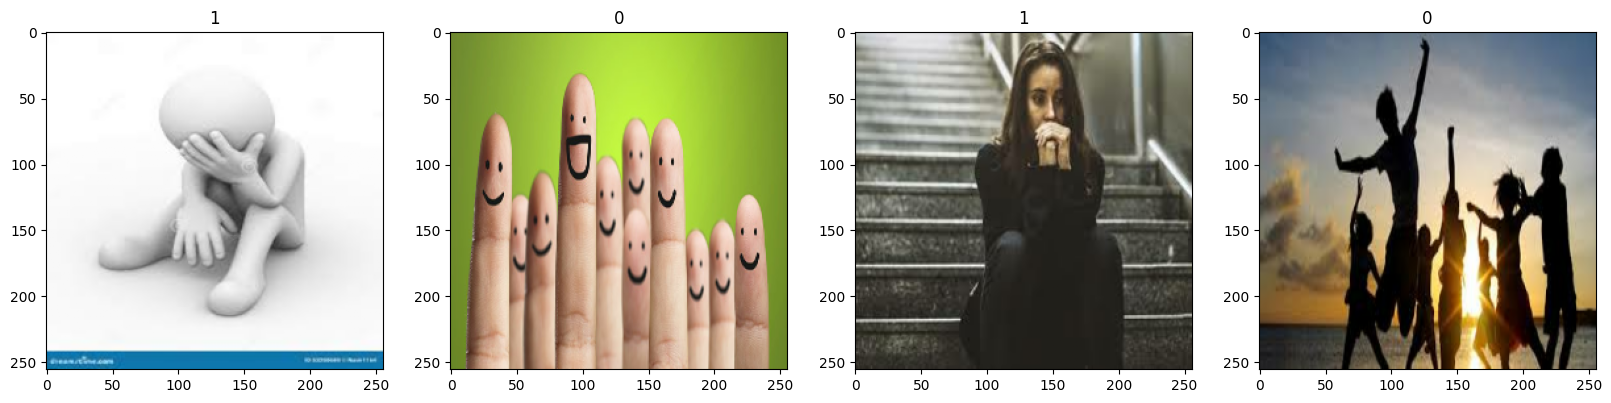

In [43]:
fig , ax = plt.subplots(ncols=4,figsize=(20,20))
for index, img in enumerate(scaled[0][:4]):
  ax[index].imshow(img)
  ax[index].set_title(scaled[1][index])

In [44]:
len(data)

9

In [46]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)+1
test_size = int(len(data)*0.1)+1

In [48]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(val_size+train_size).take(test_size)

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense ,Flatten , Dropout,Conv1D ,Conv3D

In [119]:
scaled[0].shape

(32, 256, 256, 3)

In [131]:
model2 = Sequential(
    [
        Conv2D(16,(3,3),strides=(1,1),activation='relu',input_shape=(256,256,3)),
        MaxPooling2D(),
        Conv2D(32, (3, 3), strides=1, activation="relu"),
        MaxPooling2D(),
        Conv2D(16, (3, 3), strides=1, activation="relu"),
        MaxPooling2D(),
        Flatten(),
        Dense(256, activation="relu"),
        Dense(1, activation="sigmoid"),
    ]
)

In [145]:
model2.compile(
    optimizer="adam",
    metrics= ['accuracy'],
    loss = tf.losses.BinaryCrossentropy()
)

In [146]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 16)       

In [147]:
logdir = 'logs'
callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [148]:
hist = model2.fit(train,epochs=20,validation_data=val,callbacks=[callback])

Epoch 1/20
6/6 [==============================] - 21s 1s/step - loss: 0.9626 - accuracy: 0.5625 - val_loss: 0.6541 - val_accuracy: 0.5156
Epoch 2/20
6/6 [==============================] - 8s 1s/step - loss: 0.6689 - accuracy: 0.5052 - val_loss: 0.6876 - val_accuracy: 0.3594
Epoch 3/20
6/6 [==============================] - 5s 581ms/step - loss: 0.6643 - accuracy: 0.4792 - val_loss: 0.6233 - val_accuracy: 0.7656
Epoch 4/20
6/6 [==============================] - 8s 1s/step - loss: 0.6175 - accuracy: 0.7552 - val_loss: 0.5570 - val_accuracy: 0.7188
Epoch 5/20
6/6 [==============================] - 5s 551ms/step - loss: 0.5593 - accuracy: 0.7448 - val_loss: 0.4807 - val_accuracy: 0.8750
Epoch 6/20
6/6 [==============================] - 8s 1s/step - loss: 0.4668 - accuracy: 0.8646 - val_loss: 0.4108 - val_accuracy: 0.8906
Epoch 7/20
6/6 [==============================] - 5s 542ms/step - loss: 0.3937 - accuracy: 0.8646 - val_loss: 0.2670 - val_accuracy: 0.8906
Epoch 8/20
6/6 [===============

In [151]:
import pandas as pd
pd.DataFrame(hist.history)

,loss,accuracy,val_loss,val_accuracy
0,0.962634,0.562500,0.654133,0.515625
1,0.668946,0.505208,0.687644,0.359375
2,0.664260,0.479167,0.623337,0.765625
3,0.617544,0.755208,0.556997,0.718750
4,0.559344,0.744792,0.480704,0.875000
5,0.466810,0.864583,0.410800,0.890625
6,0.393710,0.864583,0.267012,0.890625
7,0.343859,0.864583,0.271774,0.984375
8,0.288776,0.921875,0.281671,0.875000
9,0.210019,0.921875,0.167968,0.953125


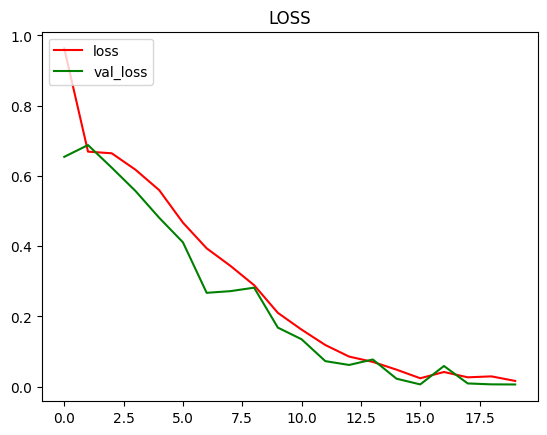

In [153]:
plt.plot(hist.history['loss'],color='red',label='loss')
plt.plot(hist.history['val_loss'], color="green", label="val_loss")
plt.title('LOSS')
plt.legend(loc="upper left")
plt.show()

In [154]:
from tensorflow.keras.metrics import Precision , Recall , BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [160]:
for batch in test.as_numpy_iterator():
  x,y = batch
  yhat = model2.predict(x)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 65ms/step


In [157]:
print(f'Pre{pre.result().numpy()}',f'Rec{re.result().numpy()}',f'Acu{acc.result().numpy()}')

Pre1.0 Rec1.0 Acu1.0


In [161]:
#new data
img = cv2.imread("/content/sad-depressed-man-702x375.jpg")
#cv2.imshow(img)
#plt.show()

DisabledFunctionError: ignored

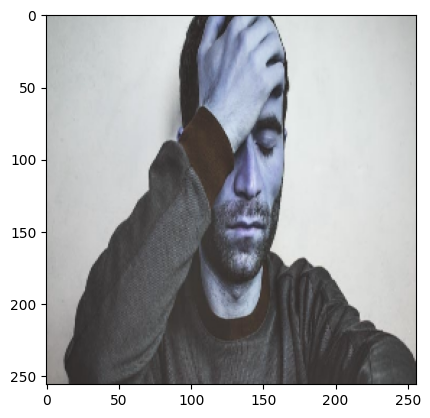

In [162]:
resize =tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [166]:
y_predict = model2.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 29ms/step


In [165]:
if y_predict > 0.5 :
  print("the predicted class sad")
else :
  print("the predicted class happy")

the predicted class sad


In [167]:
#save the model
from tensorflow.keras.models import load_model

In [168]:
model2.save(os.path.join('model',"imageClssifier(sad and happy image).h5"))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
